# Predicting Opioid Abuse: Survey Efficacy Analysis

## 1: Business Understanding
In the face of the ongoing opioid crisis, it's essential to identify individuals at risk of opioid abuse as early as possible. This project is designed to support stakeholders, such as healthcare providers, addiction counselors, and policymakers, by evaluating two different surveys to see which one better predicts opioid misuse. By finding the most reliable survey, we aim to empower these stakeholders with insights that help in early intervention and targeted support.

### 1.1: Objective
We have data from two distinct surveys, each containing information that may indicate potential risk factors for opioid abuse. However, it’s unclear which survey provides a stronger basis for accurate prediction. Our goal is to determine which dataset better identifies individuals at risk of opioid misuse, ultimately guiding our stakeholders toward the most effective tool for their work.

### 1.2: Method
To achieve this, we will employ a **machine learning classification model**. This model will analyze various factors within each survey dataset and classify individuals as either "at-risk" or "not at risk" for opioid abuse. By comparing the accuracy and reliability of the predictions made from each survey, we can identify which survey holds greater predictive power.

---

This approach will not only give a clear comparison but also offer data-driven insights into how future surveys can be designed in order to better serve the community in the fight against opioid abuse.


## 2: Data Understanding

### 2.1: Data Sources
We are working with two datasets obtained from survey data on opioid abuse and related risk factors. The two datasets are:
- **PRLMIS Data**: This dataset contains survey responses from the National Survey on Drug Use and Health (NSDUH) from 2015 to 2017. It includes information on demographic, socioeconomic, and health-related factors, along with indicators of substance use and mental health treatment.
- **Student Addiction Data**: This dataset contains responses from a survey focused on addiction risk factors among students, capturing behaviors and experiences that may indicate addiction risk, such as experimentation, social isolation, and academic performance decline.

These datasets are suitable for this project because they contain potential risk indicators relevant to opioid abuse. Comparing these surveys allows us to determine which dataset is more effective in identifying individuals at risk.


### 2.2: Dataset Overview

Importing Necessary Libraries

To start, we will import all the libraries necessary for data manipulation, visualization, and building and evaluating classification models. This includes libraries for handling data (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), and machine learning models (`sklearn` and `xgboost`).

The imported libraries cover all steps in our workflow, from loading and exploring the data to building and evaluating models.

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Model evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    classification_report
)

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


Create functions to cut down on redundancy and make code cleaner

In [10]:
def target_variable_analysis(data, target_col):
    """
    Analyzes the distribution of the target variable.
    Prints the distribution and plots a bar chart of the target variable.
    """
    target_distribution = data[target_col].value_counts(normalize=True) * 100
    print(f"\nTarget Variable ({target_col}) Distribution:")
    print(target_distribution)
    
    plt.figure(figsize=(8, 5))
    target_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title(f"Distribution of {target_col}")
    plt.xlabel(target_col)
    plt.ylabel("Percentage of Records")
    plt.show()


### 2.3: Loading the Datasets

Next, we will load the two datasets we will be working with:
1. **PRLMIS Data**: A dataset from the National Survey on Drug Use and Health (NSDUH) containing demographic and health-related data.
2. **Student Addiction Data**: A student-focused survey dataset containing indicators related to addiction risk.

After loading each dataset, we will display some basic information and the first few rows to understand the data structure.

In [4]:
# Load the datasets
prlmis_data = pd.read_csv('data/prlmis-data-full.csv')
student_addiction_data = pd.read_csv('data/student_addiction_dataset_train.csv')

# Display basic information and the first few rows for each dataset
print("PRLMIS Data (National Survey Data):")
print(prlmis_data.info())
print(prlmis_data.head())

print("\nStudent Addiction Data (Student Survey Data):")
print(student_addiction_data.info())
print(student_addiction_data.head())


PRLMIS Data (National Survey Data):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170317 entries, 0 to 170316
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   YEAR       170317 non-null  int64
 1   AGECAT     170317 non-null  int64
 2   SEX        170317 non-null  int64
 3   MARRIED    170317 non-null  int64
 4   EDUCAT     170317 non-null  int64
 5   EMPLOY18   170317 non-null  int64
 6   CTYMETRO   170317 non-null  int64
 7   HEALTH     170317 non-null  int64
 8   MENTHLTH   170317 non-null  int64
 9   PRLMISEVR  170317 non-null  int64
 10  PRLMISAB   170317 non-null  int64
 11  PRLANY     170317 non-null  int64
 12  HEROINEVR  170317 non-null  int64
 13  HEROINUSE  170317 non-null  int64
 14  TRQLZRS    170317 non-null  int64
 15  SEDATVS    170317 non-null  int64
 16  COCAINE    170317 non-null  int64
 17  AMPHETMN   170317 non-null  int64
 18  HALUCNG    170317 non-null  int64
 19  TRTMENT    170317 non-null  i

### 2.4: Descriptive Statistics and Initial Data Exploration

With both datasets loaded, we will calculate descriptive statistics to better understand the data distributions. 

Since most features in the PRLMIS Data represent categories (e.g., age groups, employment status), it is more useful to look at the frequency of each category within these features. This will help us understand the distribution of responses for each variable, which is essential for analyzing how these factors might relate to opioid abuse risk.

We will calculate the frequency counts for each categorical feature.

The Student Addiction Data primarily consists of binary categorical features (`Yes`/`No`) that indicate various behavioral, social, and health-related factors associated with addiction risk. Additionally, the target variable `Addiction_Class` specifies whether a student is at risk of addiction.

To understand the distribution of responses, we will:
1. Calculate the frequency of `Yes` and `No` responses for each feature.
2. Check for any missing values, which may need to be addressed before modeling.
3. Examine the distribution of the target variable (`Addiction_Class`) to see if there is any class imbalance that could affect model performance.

This analysis provides insight into the makeup of the dataset, helping us interpret which factors are prevalent among individuals classified as at risk versus those not at risk.


This exploration helps us to identify the key characteristics of each dataset and any initial observations, such as missing values or outliers.



In [6]:
# Category counts for categorical features in PRLMIS Data
print("\nCategory Counts for PRLMIS Data:")
for column in prlmis_data.columns:
    if prlmis_data[column].dtype == 'int64' or prlmis_data[column].dtype == 'object':
        print(f"\n{column} Value Counts:")
        print(prlmis_data[column].value_counts())


# Descriptive statistics for Student Addiction Data
print("\nDescriptive Statistics for Student Addiction Data:")
student_addiction_desc = student_addiction_data.describe(include='all')
print(student_addiction_desc)

# Frequency counts for categorical features in Student Addiction Data
print("\nFrequency Counts for Key Features in Student Addiction Data:")
for column in student_addiction_data.columns:
    if student_addiction_data[column].dtype == 'object':
        print(f"{column} Value Counts:")
        print(student_addiction_data[column].value_counts())
        print()



Category Counts for PRLMIS Data:

YEAR Value Counts:
15    57146
16    56895
17    56276
Name: YEAR, dtype: int64

AGECAT Value Counts:
2    42053
1    41577
4    33744
3    26621
5    26322
Name: AGECAT, dtype: int64

SEX Value Counts:
1    89404
0    80913
Name: SEX, dtype: int64

MARRIED Value Counts:
0    70799
1    52680
4    35130
2     9220
3     2488
Name: MARRIED, dtype: int64

EDUCAT Value Counts:
4    43227
1    41577
3    34357
5    33973
2    17183
Name: EDUCAT, dtype: int64

EMPLOY18 Value Counts:
0    83379
2    66589
1    20349
Name: EMPLOY18, dtype: int64

CTYMETRO Value Counts:
0    57146
3    50760
2    39716
1    22695
Name: CTYMETRO, dtype: int64

HEALTH Value Counts:
2    62262
3    44241
1    40400
4    18424
5     4322
6      605
7       37
0       26
Name: HEALTH, dtype: int64

MENTHLTH Value Counts:
0     116859
1      22726
2       5572
5       5411
4       5373
3       5256
6       4159
7       2460
8       1381
9        687
10       433
Name: MENTHLTH, dty

### 2.5: Checking for Missing Values

Missing values can impact model performance and may require cleaning or imputation. We’ll check both datasets for missing values to identify any columns that need attention.

This step helps ensure data quality, allowing us to address any gaps before moving forward.


In [7]:
# Check for missing values in both datasets
print("\nMissing Values in PRLMIS Data:")
print(prlmis_data.isnull().sum())

print("\nMissing Values in Student Addiction Data:")
print(student_addiction_data.isnull().sum())



Missing Values in PRLMIS Data:
YEAR         0
AGECAT       0
SEX          0
MARRIED      0
EDUCAT       0
EMPLOY18     0
CTYMETRO     0
HEALTH       0
MENTHLTH     0
PRLMISEVR    0
PRLMISAB     0
PRLANY       0
HEROINEVR    0
HEROINUSE    0
TRQLZRS      0
SEDATVS      0
COCAINE      0
AMPHETMN     0
HALUCNG      0
TRTMENT      0
MHTRTMT      0
dtype: int64

Missing Values in Student Addiction Data:
Experimentation                       2562
Academic_Performance_Decline          2498
Social_Isolation                      2550
Financial_Issues                      2537
Physical_Mental_Health_Problems       2454
Legal_Consequences                    2576
Relationship_Strain                   2543
Risk_Taking_Behavior                  2577
Withdrawal_Symptoms                   2612
Denial_and_Resistance_to_Treatment    2453
Addiction_Class                          0
dtype: int64


### 2.6: Handling Missing Values in Student Addiction Data

After analyzing the missing values in the **Student Addiction Data**, we found that approximately 2,000 rows contain missing values across various features. With a total of 50,342 rows in the dataset, this accounts for only about **4%** of the data. 

Given that this percentage is relatively low, we have decided to **remove rows with missing values** rather than impute them. This approach has several benefits:
1. **Minimal Impact on Data Distribution**: Removing 4% of rows is unlikely to significantly affect the overall distribution, patterns, or insights within the dataset.
2. **Simplicity and Integrity**: Dropping rows is straightforward and avoids introducing any assumptions about the nature of the missing values, which preserves the integrity of the remaining data.

By taking this approach, we retain a clean dataset for modeling without compromising on data quality or complexity.


In [9]:
# Drop rows with any missing values in Student Addiction Data
student_addiction_data_cleaned = student_addiction_data.dropna()

# Display new shape to confirm reduction
print("Original data shape:", student_addiction_data.shape)
print("New data shape after dropping missing rows:", student_addiction_data_cleaned.shape)
print("Data shape of PRLMIS:", prlmis_data.shape)

Original data shape: (50342, 11)
New data shape after dropping missing rows: (30072, 11)
Data shape of PRLMIS: (170317, 21)


### 2.7: Target Variable Analysis

In this section, we will analyze the target variable in each dataset to understand its distribution. This analysis is essential because an imbalanced target variable can impact model performance, especially in classification tasks. If one class significantly outnumbers the other, we may need to adjust our modeling approach or evaluation metrics to ensure reliable results.

1. **PRLMIS Data**: The target variable in this dataset is `PRLMISAB`, an ordinal scale indicating levels of prescription opioid misuse and abuse.
2. **Student Addiction Data**: The target variable is `Addiction_Class`, a binary variable indicating whether a student is at risk of addiction (`Yes`) or not at risk (`No`).


Target Variable (PRLMISAB) Distribution:
0     89.292320
2      5.543780
7      1.995690
10     1.115567
8      1.014579
9      0.972892
1      0.029944
3      0.018788
4      0.014091
5      0.002349
Name: PRLMISAB, dtype: float64


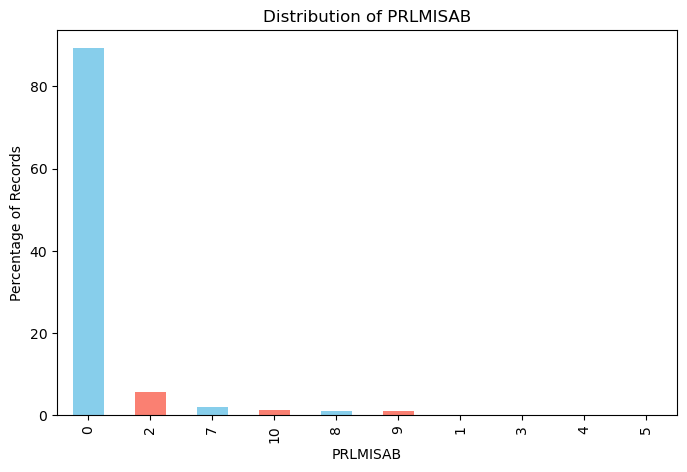


Target Variable (Addiction_Class) Distribution:
No     69.676111
Yes    30.323889
Name: Addiction_Class, dtype: float64


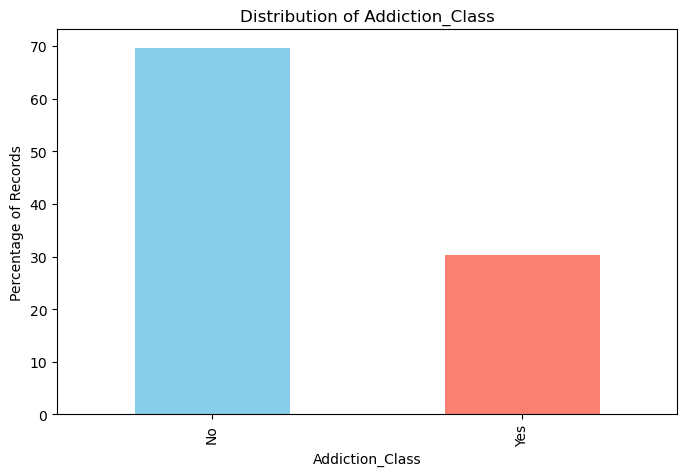

In [12]:
# Analyze target variable in PRLMIS Data
target_variable_analysis(prlmis_data, target_col='PRLMISAB')

# Analyze target variable in Student Addiction Data (after removing missing rows)
target_variable_analysis(student_addiction_data_cleaned, target_col='Addiction_Class')


### 2.8: Data Understanding Summary

Here’s what we learned about our two datasets during the data understanding phase:

1. **What’s in the Data**:
   - **PRLMIS Data**: This dataset contains information about people’s demographics, health, and substance use. It has a column called `PRLMISAB` that tells us if someone has misused opioids and to what extent.
   - **Student Addiction Data**: This dataset focuses on factors that may show addiction risk among students, like social behaviors and health issues. It has a column called `Addiction_Class` that indicates if a student is considered at risk for addiction.

2. **Missing Information**:
   - **PRLMIS Data**: This dataset is complete with no missing values.
   - **Student Addiction Data**: Around 4% of rows had some missing information in certain columns. We removed these rows since it didn’t significantly reduce the amount of data.

3. **Target Variables**:
   - **PRLMIS Data (`PRLMISAB`)**: Most records show no opioid misuse (about 89%). Since this imbalance is high, we may need to adjust our analysis to give more attention to the cases where misuse was reported.
   - **Student Addiction Data (`Addiction_Class`)**: Around 70% of students are labeled as "not at risk," while about 30% are "at risk." This is a smaller imbalance but still something to keep in mind during analysis.


With this understanding, we are ready to proceed to **Data Preparation and Feature Engineering** to ensure both datasets are aligned and suitable for modeling.


## 3: Data Preparation